<a href="https://colab.research.google.com/github/ShahzebFarruk/ELG5902_Text_Cateorization/blob/main/Text_Categorization_BERT%2B_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload()

Saving mtsamples.csv to mtsamples.csv


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.0MB 12.9MB/s 
     |████████████████████████████████| 890kB 50.6MB/s 
     |████████████████████████████████| 3.2MB 51.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=82224e559a1afaf095d52f24ce267cdd403a1087fd595d1b10e7ec75b86d76a3
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import pandas as pd
df = pd.read_csv("mtsamples.csv")
df=df.drop("m",axis=1)
df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
df['medical_specialty'].value_counts()

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

In [ ]:
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)


"\ndf.dropna(\n    axis=0,\n    how='any',\n    thresh=None,\n    subset=None,\n    inplace=True\n)\n"

In [ ]:
data_categories  = df.groupby(df['medical_specialty'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

===========Original Categories =======================
Cat:1  Allergy / Immunology : 7
Cat:2  Autopsy : 8
Cat:3  Bariatrics : 18
Cat:4  Cardiovascular / Pulmonary : 372
Cat:5  Chiropractic : 14
Cat:6  Consult - History and Phy. : 516
Cat:7  Cosmetic / Plastic Surgery : 27
Cat:8  Dentistry : 27
Cat:9  Dermatology : 29
Cat:10  Diets and Nutritions : 10
Cat:11  Discharge Summary : 108
Cat:12  ENT - Otolaryngology : 98
Cat:13  Emergency Room Reports : 75
Cat:14  Endocrinology : 19
Cat:15  Gastroenterology : 230
Cat:16  General Medicine : 259
Cat:17  Hematology - Oncology : 90
Cat:18  Hospice - Palliative Care : 6
Cat:19  IME-QME-Work Comp etc. : 16
Cat:20  Lab Medicine - Pathology : 8
Cat:21  Letters : 23
Cat:22  Nephrology : 81
Cat:23  Neurology : 223
Cat:24  Neurosurgery : 94
Cat:25  Obstetrics / Gynecology : 160
Cat:26  Office Notes : 51
Cat:27  Ophthalmology : 83
Cat:28  Orthopedic : 355
Cat:29  Pain Management : 62
Cat:30  Pediatrics - Neonatal : 70
Cat:31  Physical Medicine - Rehab :

In [ ]:
filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 270)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
i=1
print('============Reduced Categories ======================')
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1

print('============ Reduced Categories ======================')

============Reduced Categories ======================
Cat:1  Cardiovascular / Pulmonary : 372
Cat:2  Consult - History and Phy. : 516
Cat:3  Orthopedic : 355
Cat:4  Radiology : 273
Cat:5  Surgery : 1103
============ Reduced Categories ======================


In [ ]:
filtered_data_categories

,description,medical_specialty,sample_name,transcription,keywords
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."
11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler..."
...,...,...,...,...,...
4972,Adenosine with nuclear scan as the patient un...,Cardiovascular / Pulmonary,Adenosine Nuclear Scan,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...","cardiovascular / pulmonary, adenosine nuclear ..."
4973,Patient presents with a chief complaint of ch...,Cardiovascular / Pulmonary,Acute Inferior Myocardial Infarction,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",NaN
4974,Patient had a recurrent left arm pain after h...,Cardiovascular / Pulmonary,Angina - Consult,"HISTORY OF PRESENT ILLNESS: , The patient is a...",NaN
4975,Patient had a markedly abnormal stress test w...,Cardiovascular / Pulmonary,Abnormal Stress Test,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...","cardiovascular / pulmonary, standard bruce, ni..."


In [ ]:
data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape

(2603, 2)

In [ ]:
data

,transcription,medical_specialty
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary
...,...,...
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary
4973,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary
4974,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary
4975,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",Cardiovascular / Pulmonary


In [ ]:
import torch
from tqdm.notebook import tqdm
import pandas as pd

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

df.head()

,transcription,medical_specialty,label,data_type
3,2-d m-mode: 1 . left atrial enlargement leave ...,Cardiovascular / Pulmonary,0,train
4,1 . The left ventricular cavity size wall thic...,Cardiovascular / Pulmonary,0,val
7,2-d echocardiogram. multiple view heart great...,Cardiovascular / Pulmonary,0,train
9,description: . normal cardiac chamber size. 2 ...,Cardiovascular / Pulmonary,0,train
11,2-d stud. 1 . mild aortic stenosis. widely ca...,Cardiovascular / Pulmonary,0,val


In [ ]:
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
Name: medical_specialty, dtype: int64

In [ ]:
possible_labels = data.medical_specialty.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{' Cardiovascular / Pulmonary': 0,
 ' Consult - History and Phy.': 4,
 ' Orthopedic': 3,
 ' Radiology': 2,
 ' Surgery': 1}

In [ ]:
data['label'] = data.medical_specialty.replace(label_dict)

In [ ]:
data

,transcription,medical_specialty,label
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,0
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,0
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,0
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,0
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,0
...,...,...,...
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,0
4973,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary,0
4974,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary,0
4975,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",Cardiovascular / Pulmonary,0


In [ ]:
data

,transcription,medical_specialty,label
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,0
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,0
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,0
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,0
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,0
...,...,...,...
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,0
4973,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary,0
4974,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary,0
4975,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",Cardiovascular / Pulmonary,0


In [ ]:
df

,transcription,medical_specialty,label,data_type
3,2-d m-mode: 1 . left atrial enlargement leave ...,Cardiovascular / Pulmonary,0,train
4,1 . The left ventricular cavity size wall thic...,Cardiovascular / Pulmonary,0,val
7,2-d echocardiogram. multiple view heart great...,Cardiovascular / Pulmonary,0,train
9,description: . normal cardiac chamber size. 2 ...,Cardiovascular / Pulmonary,0,train
11,2-d stud. 1 . mild aortic stenosis. widely ca...,Cardiovascular / Pulmonary,0,val
...,...,...,...,...
4972,indication :. chest pain .. type of test :. ...,Cardiovascular / Pulmonary,0,train
4973,chief complaint :. chest pain .. history of ...,Cardiovascular / Pulmonary,0,train
4974,history of present illness :. The patient 68-...,Cardiovascular / Pulmonary,0,val
4975,history of present illness :. mr. abc 60-year...,Cardiovascular / Pulmonary,0,train


In [ ]:
df=data

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.33, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df.groupby(['medical_specialty', 'label', 'data_type']).count()

transcription
medical_specialty           label data_type               
 Cardiovascular / Pulmonary 0     train                248
                                  val                  123
 Consult - History and Phy. 4     train                346
                                  val                  170
 Orthopedic                 3     train                238
                                  val                  117
 Radiology                  2     train                183
                                  val                   90
 Surgery                    1     train                729
                                  val                  359

In [ ]:
len(X_train)

1744

In [ ]:
#df=df.drop(['medical_specialty','sample_name','keywords','description'], axis=1)

In [ ]:
df

,transcription,medical_specialty,label,data_type
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,0,train
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,0,val
7,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,0,train
9,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,0,train
11,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,0,val
...,...,...,...,...
4972,"INDICATION: , Chest pain.,TYPE OF TEST: , Aden...",Cardiovascular / Pulmonary,0,train
4973,"CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...",Cardiovascular / Pulmonary,0,train
4974,"HISTORY OF PRESENT ILLNESS: , The patient is a...",Cardiovascular / Pulmonary,0,val
4975,"HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...",Cardiovascular / Pulmonary,0,train


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    tokenizer_word= word_tokenize(str(sentence))
    filtered_sentence = ' '.join([w for w in tokenizer_word if not w in stop_words])
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(filtered_sentence))  
    #print(nltk_tagged)
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag).lower())
    return " ".join(lemmatized_sentence)

#X['Wordtoken_cleaned_txt']=X['description'].apply(lemmatize_sentence)
#X['description']=X['description'].apply(lemmatize_sentence)
#X['sample_name']=X['sample_name'].apply(lemmatize_sentence)
df['transcription']=df['transcription'].apply(lemmatize_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df["transcription"][3]

'2-d m-mode : , ,1 . left atrial enlargement leave atrial diameter 4.7 cm.,2 . normal size right leave ventricle.,3 . normal lv systolic function leave ventricular ejection fraction 51 % .,4 . normal lv diastolic function.,5 . No pericardial effusion.,6 . normal morphology aortic valve , mitral valve , tricuspid valve , pulmonary valve.,7 . pa systolic pressure 36 mmhg . , doppler : , ,1 . mild mitral tricuspid regurgitation.,2 . trace aortic pulmonary regurgitation .'

In [ ]:
print(df["transcription"][3])

2-d m-mode : , ,1 . left atrial enlargement leave atrial diameter 4.7 cm.,2 . normal size right leave ventricle.,3 . normal lv systolic function leave ventricular ejection fraction 51 % .,4 . normal lv diastolic function.,5 . No pericardial effusion.,6 . normal morphology aortic valve , mitral valve , tricuspid valve , pulmonary valve.,7 . pa systolic pressure 36 mmhg . , doppler : , ,1 . mild mitral tricuspid regurgitation.,2 . trace aortic pulmonary regurgitation .


In [ ]:
df["transcription"] = df["transcription"].str.replace(".,",". ").astype(str)
df["transcription"] = df["transcription"].str.replace(".,",". ").astype(str)

In [ ]:
print(df["transcription"][7]+'\n')
print(df["transcription"][3])

2-d echocardiogram.  multiple view heart great vessel reveal normal intracardiac great vessel relationship . cardiac function normal . There significant chamber enlargement hypertrophy . There pericardial effusion vegetation see . doppler interrogation.  include color flow imaging.  reveals systemic venous return right atrium normal tricuspid inflow . pulmonary outflow normal valve . pulmonary venous return leave atrium . The interatrial septum intact . mitral inflow ascend aorta flow normal . The aortic valve trileaflet . The coronary artery appear normal origin . The aortic arch left-sided patent normal descend aorta pulsatility .

2-d m-mode :. . 1 . left atrial enlargement leave atrial diameter 4.7 cm. 2 . normal size right leave ventricle. 3 . normal lv systolic function leave ventricular ejection fraction 51 % . 4 . normal lv diastolic function. 5 . No pericardial effusion. 6 . normal morphology aortic valve.  mitral valve.  tricuspid valve.  pulmonary valve. 7 . pa systolic pres

In [ ]:
df["transcription"] = df["transcription"].str.replace(" :. . ",": ").astype(str)

In [ ]:
#df["transcription"] = df["transcription"].str.replace(",","").astype(str)
#df["transcription"] = df["transcription"].str.replace(",","").astype(str)

In [ ]:
df_3=df['transcription'][11]

In [ ]:
len(df_3)

626

In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].transcription.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].transcription.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
input_ids_train[9]

tensor([  101,  6412,  1997,  7709,  1024,  1012,  2044,  6413, 12160,  9619,
         6855,  5776,  2716, 10514, 19265,  4082,  2282,  2173,  4082,  2282,
         2795,  1012, 15946,  2236,  2019, 25344,  3081,  2203,  4140, 22648,
        20192,  2140, 20014, 19761,  3508, 14570,  2302,  7669,  1012,  1996,
         5776,  1005,  1055,  2157,  3239, 17463,  5669,  2852, 24065, 25403,
         6728, 11039,  8865,  7712,  4827,  7709,  4088,  1012,  1037,  7318,
        11876, 28699, 25100, 19274,  2157,  3239,  5787,  9530, 19792,  6593,
        11444,  2140,  2566,  9956,  8029,  4685, 15291,  2271, 15850,  2135,
         3565,  7856, 12002,  2135,  1012,  1999, 20523,  2240,  2275,  1999,
         7512, 12184,  8737,  6525,  2140, 29371,  2048,  3176,  8040,  3917,
        11439,  8029,  2191,  3565,  7856, 12002,  3565, 12184,  8737,  6525,
         2140, 29371,  1012,  1037, 10014,  3614,  5851,  3239,  2224,  1021,
         1011,  1014, 10967, 23320, 10514, 11244,  1012,   102, 

In [ ]:
#e_3

In [ ]:
#len(e_3['input_ids'])

In [ ]:
'''
for i in e_3['input_ids']:
  print(i)
e_3=encoded_data_train
'''

"\nfor i in e_3['input_ids']:\n  print(i)\ne_3=encoded_data_train\n"

In [ ]:
torch.set_printoptions(edgeitems=1)

In [ ]:
input_ids_train.size()

torch.Size([1744, 256])

In [ ]:
attention_masks_train.size()

torch.Size([1744, 256])

In [ ]:
labels_train.size()

torch.Size([1744])

In [ ]:
# Single segment input
single_seg_input = tokenizer.encode_plus("This is a sample input")

# Multiple segment input
multi_seg_input = tokenizer.encode_plus("This is segment A", "This is segment B")

print("Single segment token (str): {}".format(tokenizer.convert_ids_to_tokens(7233)))
#print("Single segment token (int): {}".format(e_3['input_ids'][0]))
#print("Single segment type       : {}".format(e_3['attention_mask'][0]))

# Segments are concatened in the input to the model, with 
##
#print("Multi segment token (str): {}".format(tokenizer.convert_ids_to_tokens(multi_seg_input['input_ids'])))
#print("Multi segment token (int): {}".format(multi_seg_input['input_ids']))
##print("Multi segment type       : {}".format(multi_seg_input['token_type_ids'])

Single segment token (str): recovery


In [ ]:
df['transcription'][3]

'2-d m-mode: 1 . left atrial enlargement leave atrial diameter 4.7 cm. 2 . normal size right leave ventricle. 3 . normal lv systolic function leave ventricular ejection fraction 51 % . 4 . normal lv diastolic function. 5 . No pericardial effusion. 6 . normal morphology aortic valve.  mitral valve.  tricuspid valve.  pulmonary valve. 7 . pa systolic pressure 36 mmhg ..  doppler: 1 . mild mitral tricuspid regurgitation. 2 . trace aortic pulmonary regurgitation .'

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
dataset_train

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
print(dataloader_train)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:

from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    w=[0,0,0,0,0,0,0,0]
    i=0

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}')
        q=len(y_preds[y_preds==label])
        e=len(y_true)
        w[i]=w[i]+q/e
        i=i+1
        print('Accuracy in % = '+ str(w[i-1]*100) + '%')
        print('\n')
    return w

In [ ]:
#device='cpu'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).



Epoch 1
Training loss: 1.0543189305440872
Validation loss: 0.743982380768771
F1 Score (Weighted): 0.6216061987494177



Epoch 2
Training loss: 0.709950519168807
Validation loss: 0.6846081785572116
F1 Score (Weighted): 0.6499292107466655



Epoch 3
Training loss: 0.6074769505718883
Validation loss: 0.7562406949036939
F1 Score (Weighted): 0.6474239536936939



Epoch 4
Training loss: 0.5498237522011719
Validation loss: 0.773895052933371
F1 Score (Weighted): 0.6556935477613112



Epoch 5
Training loss: 0.4968063337856398
Validation loss: 0.7989925557134173
F1 Score (Weighted): 0.6548763912275141



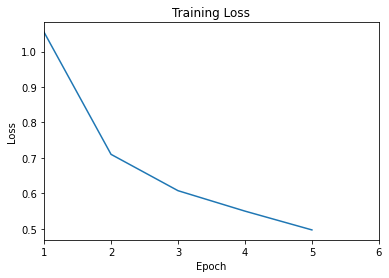

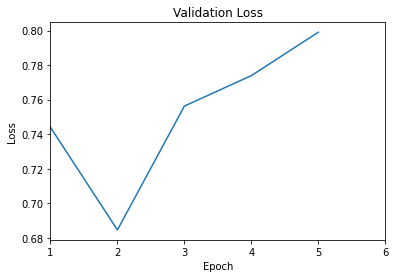

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = "cuda:0"
model = model.to(device)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

from google.colab import drive
drive.mount('/content/gdrive')
train_loss_list=[]
epoch_list=[]
val_loss_list=[]

for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

        
    model_save_name = 'classifier_bert_improved.pt'
    path = F"/content/gdrive/My Drive/{model_save_name}" 
    torch.save(model.state_dict(), path)

    #torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    import matplotlib.pyplot as plt 
    train_loss_list.append(loss_train_avg)
    val_loss_list.append(val_loss)
    #fig, axs = plt.subplots(2, 1)
    
    epoch_list.append(epoch) 
    if epoch==5:
      plt.xlabel('Epoch') 
      # naming the y axis 
      plt.ylabel('Loss') 
  
      # giving a title to my graph 
      plt.title('Training Loss')
      plt.xlim(1,6)
      plot1 = plt.figure(1)
      plt.plot(epoch_list, train_loss_list ,label = "Training Loss")
      #if epoch>2:
      #  plt.show()
      #plt.xlim(1,6)
      plot2 = plt.figure(2) 
      plt.xlabel('Epoch') 
      plt.ylabel('Loss') 
  
      plt.title('Validation Loss')
      plt.plot(epoch_list, val_loss_list ,label = "Validation Loss")
      plt.xlim(1,6)
      #if epoch>2:
      #  plt.show()
    #if epoch>0:
    #  plt.show()
     

<function matplotlib.pyplot.show>

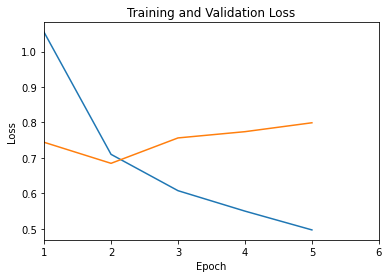

In [ ]:
plt.title('Training and Validation Loss')
plt.xlim(1,6)
plt.plot(epoch_list, train_loss_list ,label = "Training Loss")
plt.plot(epoch_list, val_loss_list ,label = "Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show

In [ ]:
'''train_loss_list=[1,2,3]
epoch_list=[1,2,3]
val_loss_list=[9,5,3]

#train_loss_list.append(loss_train_avg)
#val_loss_list.append(val_loss)

plt.xlim(1,9)
plot1 = plt.figure(1)
plt.plot(epoch_list, train_loss_list ,label = "Training Loss")
plt.show()
#axs[1, 0].xlim(1,9)
#
plot2 = plt.figure(2) 
plt.plot(epoch_list, val_loss_list ,label = "Validation Loss")
plt.xlim(1,9)
plt.show()
#if epoch>0:
#  plt.show()
'''

'train_loss_list=[1,2,3]\nepoch_list=[1,2,3]\nval_loss_list=[9,5,3]\n\n#train_loss_list.append(loss_train_avg)\n#val_loss_list.append(val_loss)\n\nplt.xlim(1,9)\nplot1 = plt.figure(1)\nplt.plot(epoch_list, train_loss_list ,label = "Training Loss")\nplt.show()\n#axs[1, 0].xlim(1,9)\n#\nplot2 = plt.figure(2) \nplt.plot(epoch_list, val_loss_list ,label = "Validation Loss")\nplt.xlim(1,9)\nplt.show()\n#if epoch>0:\n#  plt.show()\n'

In [ ]:
'''
train_loss_list=[1,2,3]
epoch_list=[1,2,3]
val_loss_list=[1,2,3]

#train_loss_list.append(loss_train_avg)
#val_loss_list.append(val_loss)
fig, axs = plt.subplots(2, 1)
    
#epoch_list.append(epoch) 

axs[0, 0].plot(epoch_list, train_loss_list)
axs[0, 0].set_title('Training Loss Plot')
axs[1, 0].plot(epoch_list, val_loss_list , 'tab:orange')
axs[1, 0].set_title('Validation Loss Plot')
for ax in axs.flat:
  ax.set(xlabel='Epoch', ylabel='Loss')
'''

"\ntrain_loss_list=[1,2,3]\nepoch_list=[1,2,3]\nval_loss_list=[1,2,3]\n\n#train_loss_list.append(loss_train_avg)\n#val_loss_list.append(val_loss)\nfig, axs = plt.subplots(2, 1)\n    \n#epoch_list.append(epoch) \n\naxs[0, 0].plot(epoch_list, train_loss_list)\naxs[0, 0].set_title('Training Loss Plot')\naxs[1, 0].plot(epoch_list, val_loss_list , 'tab:orange')\naxs[1, 0].set_title('Validation Loss Plot')\nfor ax in axs.flat:\n  ax.set(xlabel='Epoch', ylabel='Loss')\n"

In [ ]:
model_save_name = 'classifier_bert_improved.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)
model.load_state_dict(torch.load(path))
#model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
Accuracy_score=accuracy_per_class(predictions, true_vals)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Class:  Cardiovascular / Pulmonary
Accuracy: 57/123
Accuracy in % = 46.34146341463415%


Class:  Surgery
Accuracy: 272/359
Accuracy in % = 75.76601671309191%


Class:  Radiology
Accuracy: 59/90
Accuracy in % = 65.55555555555556%


Class:  Orthopedic
Accuracy: 42/117
Accuracy in % = 35.8974358974359%


Class:  Consult - History and Phy.
Accuracy: 133/170
Accuracy in % = 78.23529411764706%




In [ ]:
average_accuracy=0
for i in Accuracy_score:
  average_accuracy=average_accuracy+i
print('The average Accuracy Score for the Multi-Class Text Categorization for our BERT Model+ is '+ str(round(average_accuracy*100/5,2)) +' %')

The average Accuracy Score for the Multi-Class Text Categorization for our BERT Model+ is 60.36 %
